This project aims to analyze a dataset containing information about westbound traffic on the I-94 Interstate highway. The dataset, made available by John Hogue and obtained from the UCI Machine Learning Repository, includes various factors such as weather conditions, time of day, day of the week, and other variables that may influence traffic patterns on the highway. The goal of this analysis is to identify indicators of heavy traffic on the I-94 highway, which could provide valuable insights for traffic management and planning efforts.

Our objective with this project is to explore the dataset, identify potential factors that contribute to heavy traffic, and analyze their relationships with traffic volume on the I-94 highway. By leveraging descriptive statistics, data visualization techniques, and predictive modeling, we aim to uncover patterns, correlations, and trends in the data that can help us understand when and why traffic tends to be heavier on the I-94 highway. Ultimately, we seek to provide actionable insights and recommendations to stakeholders and decision-makers for improving traffic flow and congestion mitigation strategies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset contains 48,204 rows and 9 columns, all of which are populated without any missing values. Each row represents a specific hour and includes traffic and weather data collected from October 2, 2012, at 09:00:00, to September 30, 2018, at 23:00:00.

The data originates from a monitoring station located approximately midway between Minneapolis and Saint Paul. Traffic flow is recorded in the westbound direction, indicating vehicles moving from east to west. It's important to note that our analysis should focus on understanding westbound traffic conditions near the station. Therefore, any conclusions drawn should be limited to this specific area and should not be generalized to represent the entire I-94 highway.

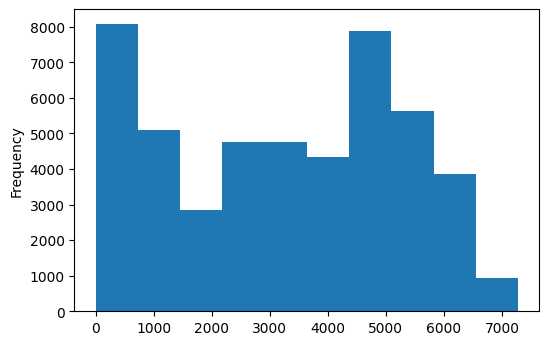

In [5]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between October 2, 2012, at 09:00:00, and September 30, 2018, at 23:00:00, the traffic volume exhibited considerable variation, ranging from 0 to 7,280 cars per hour. On average, approximately 3,260 cars passed the monitoring station each hour during this period.

Approximately 25% of the time, the traffic volume was relatively low, with only 1,193 cars or fewer observed passing the station per hour. This occurrence likely corresponds to nighttime hours or instances when road construction limits traffic flow. Conversely, about 25% of the time, the traffic volume was substantially higher, with 4,933 cars or more passing the station per hour.

This observation presents an intriguing avenue for our analysis: comparing the characteristics of daytime traffic data with those of nighttime traffic data.

#  Traffic Volume: Day vs. Night


We'll begin by partitioning the dataset into two segments:

Data for daytime: encompassing the hours between 7 a.m. and 7 p.m., totaling 12 hours.
Data for nighttime: covering the hours from 7 p.m. to 7 a.m., also spanning 12 hours.

Histograms will then be plotted for the two dataset to identify patterns in traffic at both period.

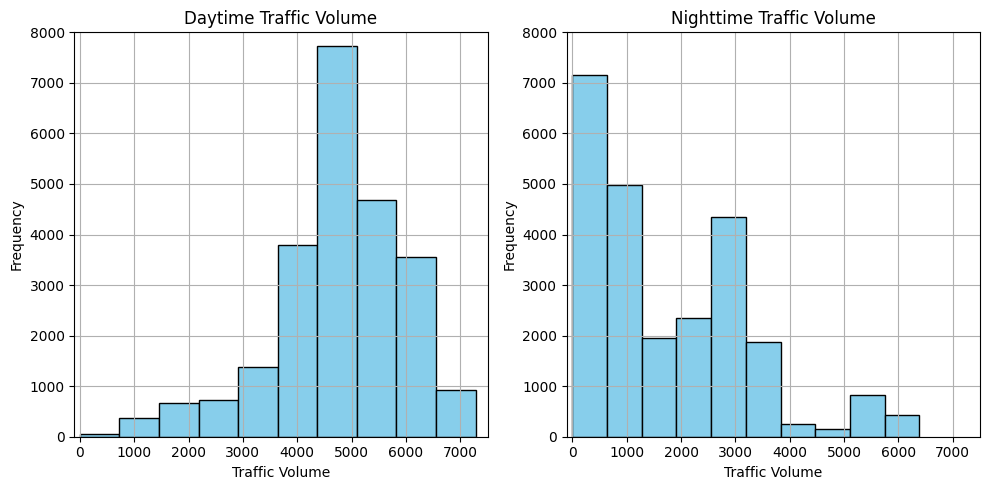

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['hour'] = traffic['date_time'].dt.hour

# Dividing the dataset into daytime (7:00 AM to 7:00 PM) and nighttime (7:00 PM to 7:00 AM) subsets
daytime_traffic = traffic[(traffic['hour'] >= 7) & (traffic['hour'] < 19)]
nighttime_traffic = traffic[(traffic['hour'] < 7) | (traffic['hour'] >= 19)]

# Plotting histograms of traffic volume for daytime and nighttime
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
daytime_traffic['traffic_volume'].hist(color='skyblue', edgecolor='black')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Daytime Traffic Volume')

plt.subplot(1, 2, 2)
nighttime_traffic['traffic_volume'].hist(color='skyblue', edgecolor='black')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Nighttime Traffic Volume')

plt.tight_layout()
plt.show()

In [8]:
daytime_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
nighttime_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram depicting the distribution of traffic volume during the day exhibits a left-skewed pattern, indicating that the majority of traffic volume values are high. Specifically, 75% of the time, there are 4,252 or more cars passing the station each hour, as evidenced by the fact that 25% of values fall below this threshold.

Conversely, the histogram representing nighttime data displays a right-skewed distribution, indicating that the majority of traffic volume values are low. In other words, 75% of the time, the number of cars passing the station each hour is less than 2,819, highlighting the prevalence of lighter traffic during nighttime hours.

Nighttime traffic generally remains light, while occasional measurements exceeding 5,000 cars per hour are observed which might be due to factors such as Nighttime Events, Shift Work or Nightlife etc.. 

Given an objective of identifying indicators of heavy traffic, the analysis will exclusively focus on daytime data moving forward.

# Time Indicators


Time can serve as a significant factor indicating heavy traffic. Variations in traffic volume may occur based on the month, day of the week, or specific times during the day.

I'll examine several line plots to illustrate the fluctuations in traffic volume concerning the following factors:
- Month
- Day of the week
- Time of day

In [10]:
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
by_month = daytime_traffic.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-10-635c804b47ae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

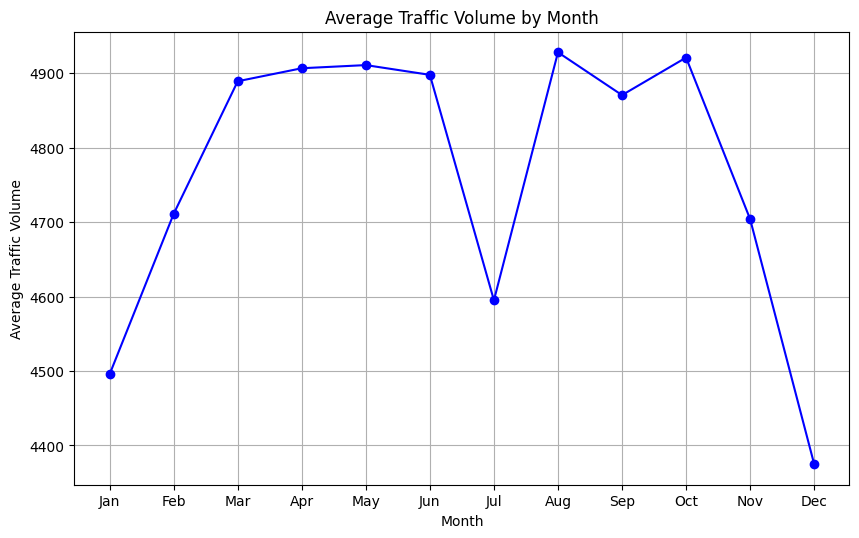

In [11]:
plt.figure(figsize=(10, 6))
by_month['traffic_volume'].plot(kind='line', marker='o', color='b')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Traffic appears to be lighter during colder months (November–February) and heavier during warmer months (March–October), with one notable exception: July. Is there any particular reason for this anomaly in July? Is traffic consistently lighter in July each year?

To address this inquiry, I will investigate the variations in traffic volume during the month of July across different years.

In [12]:
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-12-75beb36b9512>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

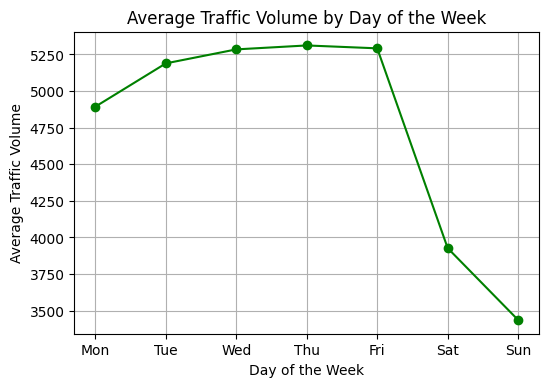

In [13]:
by_dayofweek['traffic_volume'].plot(kind='line', marker='o', color='g')
plt.title('Average Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

Throughout the workweek, starting from Mondays, traffic congestion tends to intensify gradually, reaching its peak between Wednesdays and Fridays. This escalation in traffic volume correlates with the typical rhythm of weekdays, as commuters, workers, and students are more active and on the move during these days. The combination of rush hours, commuting to and from work or school, and commercial activities contributes to the increased traffic flow.

Conversely, during the weekends, there is a notable decline in traffic activity. This decrease can be attributed to several factors, including reduced work-related travel, fewer school-related activities, and a general slowdown in commercial and business operations. Additionally, weekends often see more leisure-oriented activities, with people spending time at home, engaging in recreational pursuits, or traveling for leisure purposes, which can further contribute to the decrease in traffic congestion.

In [14]:
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
bussiness_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-14-f3f666925a13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



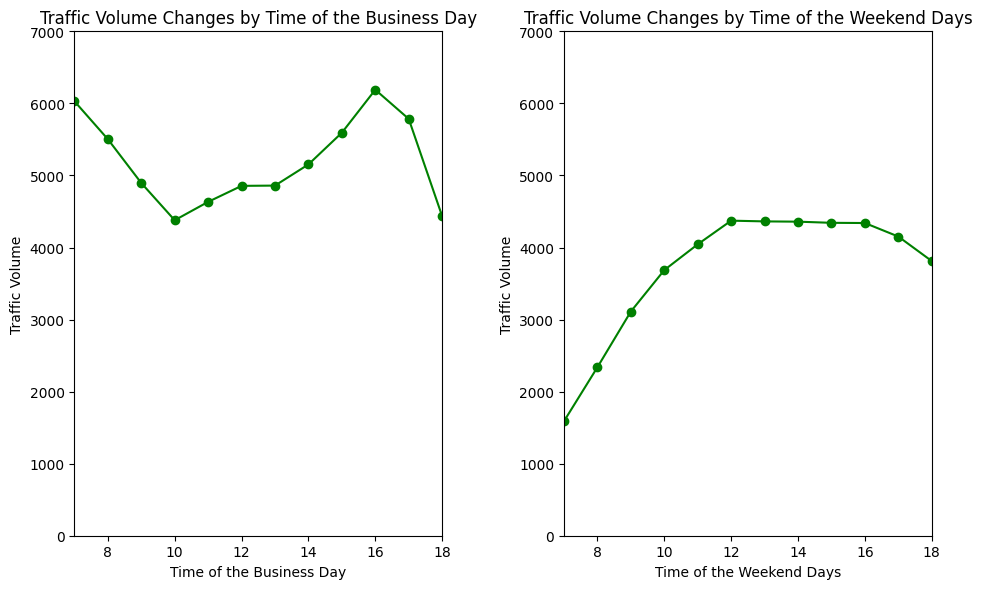

In [15]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plotting the line plot for business days
plt.subplot(1, 2, 1)  # 2 rows, 1 column, plot 1
by_hour_business['traffic_volume'].plot(marker='o', color='g')
plt.title('Traffic Volume Changes by Time of the Business Day')
plt.xlabel('Time of the Business Day')
plt.ylabel('Traffic Volume')
plt.xlim(7, 18)  # Set x-axis range
plt.ylim(0, 7000)  # Set y-axis range

# Plotting the line plot for weekends
plt.subplot(1, 2, 2)  # 2 rows, 1 column, plot 2
by_hour_weekend['traffic_volume'].plot(marker='o', color='g')
plt.title('Traffic Volume Changes by Time of the Weekend Days')
plt.xlabel('Time of the Weekend Days')
plt.ylabel('Traffic Volume')
plt.xlim(7, 18)  # Set x-axis range
plt.ylim(0, 7000)  # Set y-axis range

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Analysis of Traffic Volume Changes by Time of the Day
The provided line plots visualize the changes in traffic volume by time of the day, distinguishing between business days and weekends. Here are some observations:

    Traffic Volume on Business Days:
- Peak Hours: The traffic volume started high at 7 AM, decreases and gradually increases to around 4 PM, with a notable peak around 4 PM. This indicates heavy traffic during typical business hours, possibly due to commuters traveling to and from work.
- Decrease in Evening: After the peak at 4 PM, the traffic volume decreases steadily towards the evening, reaching its lowest point by 6 PM. This decline suggests a reduction in commuter traffic as the workday concludes.

    Traffic Volume on Weekends:
- Lower Overall Volume: Compared to business days, the traffic volume on weekends is significantly lower throughout the day.
- Steady Volume: Unlike business days, there is no distinct peak hour observed on weekends. Instead, the traffic volume remains relatively stable and consistent from morning to evening, with slight fluctuations.

    Key Takeaways:
- Peak Hours vs. Consistency: The traffic pattern on business days exhibits distinct peak hours, likely influenced by work-related commuting. In contrast, weekends show a more consistent traffic volume throughout the day, reflecting leisure activities rather than commuter traffic.
- Differences in Traffic Intensity: The traffic volume on business days is generally higher, indicating the impact of weekday commuting and work-related activities. Weekends, on the other hand, see lower overall traffic volumes, reflecting a decrease in commuter traffic and potentially more relaxed travel patterns.

Overall, these visualizations provide insights into how traffic volume varies by time of the day, highlighting the differences between business days and weekends in terms of traffic patterns and intensity.

# Weather Indicators

In [16]:
# Calculate correlation values between traffic_volume and each weather column separately
correlation_temp = traffic['traffic_volume'].corr(traffic['temp'])
correlation_rain = traffic['traffic_volume'].corr(traffic['rain_1h'])
correlation_snow = traffic['traffic_volume'].corr(traffic['snow_1h'])
correlation_clouds = traffic['traffic_volume'].corr(traffic['clouds_all'])

# Print correlation values
print("Correlation values:")
print(f"Temperature: {correlation_temp}")
print(f"Rain: {correlation_rain}")
print(f"Snow: {correlation_snow}")
print(f"Clouds: {correlation_clouds}")

Correlation values:
Temperature: 0.13029879817112658
Rain: 0.00471370236785923
Snow: 0.0007334345358283799
Clouds: 0.06705377704283502


Temperature has the strongest correlation with traiffic volume . A scatter plot between the temperature column and traffic volume is plotted below.

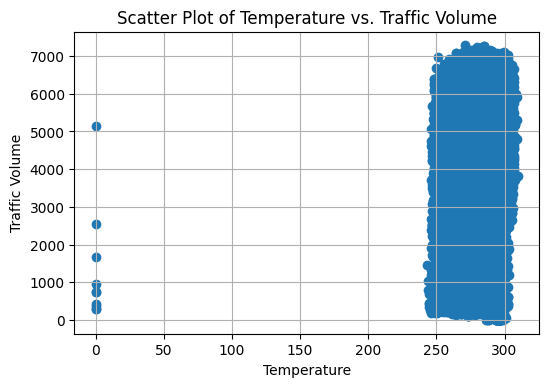

In [17]:
# Plot scatter plot for temperature vs traffic volume
plt.scatter(traffic['temp'], traffic['traffic_volume'])
plt.title('Scatter Plot of Temperature vs. Traffic Volume')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

Temperature does not look like a reliable indicator for heavy traffic.

# Weather Types

In [18]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_description = daytime_traffic.groupby('weather_description').mean()

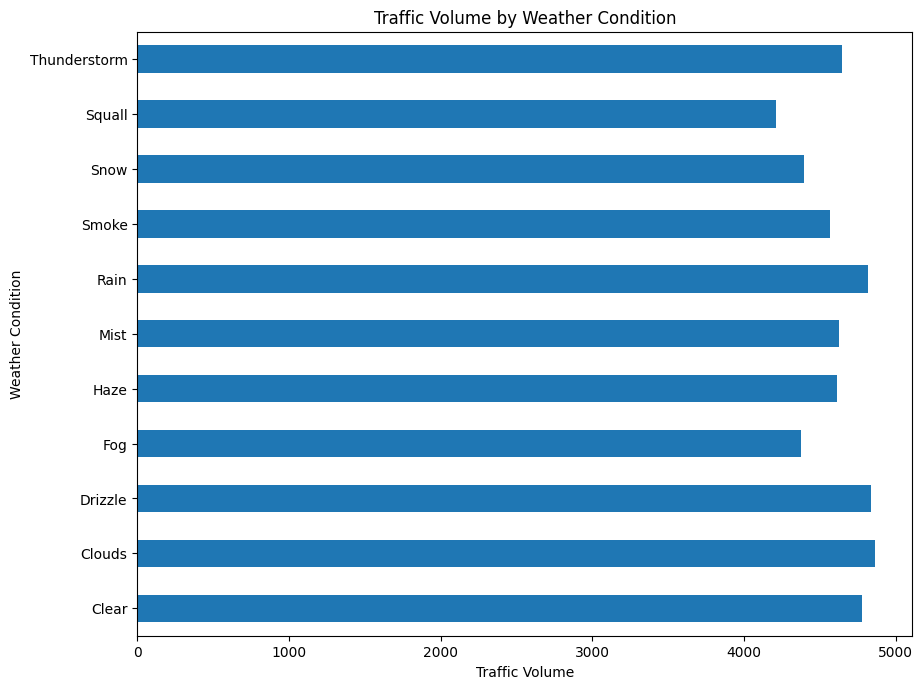

In [19]:
by_weather_main['traffic_volume'].plot(kind='barh', figsize=(10, 8))
plt.title('Traffic Volume by Weather Condition')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Condition')
plt.show()

It appears that no weather type exhibits a traffic volume surpassing 5,000 cars. This poses a challenge in identifying indicators for heavy traffic. To address this limitation, let's additionally categorize the data by weather_description, offering a more detailed and nuanced classification of weather conditions.

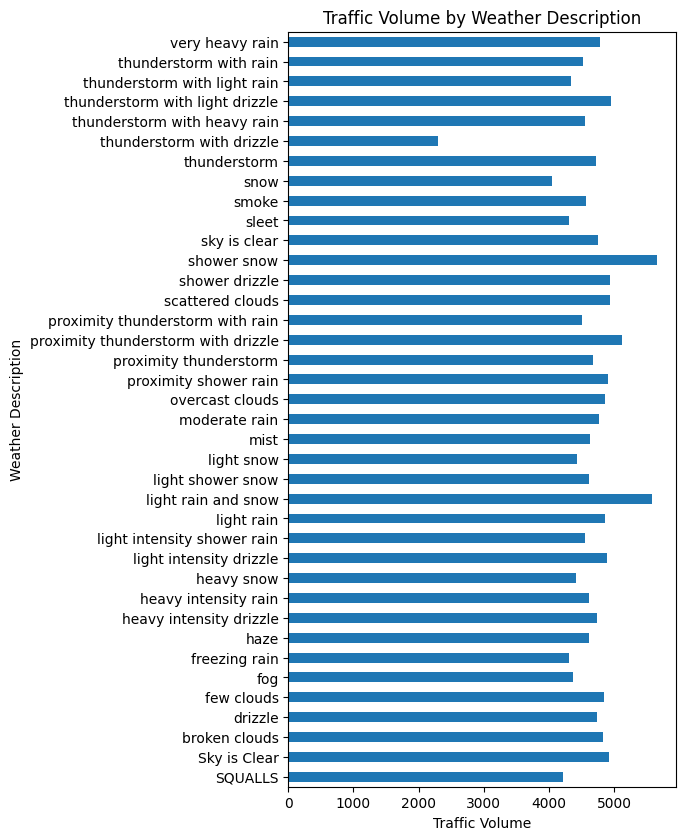

In [20]:
by_weather_description['traffic_volume'].plot(kind='barh', figsize=(5, 10))
plt.title('Traffic Volume by Weather Description')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

It appears that among the various weather types, three conditions—Shower snow, Light rain and snow, and Proximity thunderstorm with drizzle—record traffic volumes exceeding 5,000 cars. Surprisingly, these weather conditions are not traditionally considered severe. 

One possible explanation for the higher traffic volumes during these conditions could be that individuals opt for their cars over alternative modes of transportation such as biking or walking when faced with inclement weather. This behavior might arise from a perceived need for comfort or safety during adverse weather, leading to increased car usage despite the challenging conditions. Further analysis is required to fully understand the underlying reasons behind the observed traffic patterns during these weather conditions.

# Conclusion

In this project, our aim was to identify several indicators of heavy traffic on the I-94 Interstate highway. Through our analysis, we uncovered two main types of indicators:

Time-based Indicators:
- Typically, traffic volumes exhibit higher levels during the warmer months spanning from March to October, in contrast to the colder months from November to February.
- Weekdays, particularly business days, experience heavier traffic compared to weekends.
- Rush hours, typically occurring around 7 AM and 4 PM, coincide with peak traffic times on business days.

Weather-based Indicators:
- Our analysis revealed certain weather conditions that coincide with heavier traffic volumes:
  - Shower snow
  - Light rain and snow
  - Proximity thunderstorm with drizzle

These findings shed light on factors influencing heavy traffic on the I-94, providing valuable insights for understanding and potentially mitigating traffic congestion on the highway. Further investigation and refinement of these indicators may lead to more effective traffic management strategies in the future.